In [1]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.2.4'

In [21]:
#이미지가 저장된 디렉토리 불러오기
data_dir = '/Users/joannakang/Desktop/kakaoclassification'

In [25]:
class_name = os.listdir(data_dir)
print(class_name)

['Apeach', 'Muzi_con', 'Jay']


In [26]:
train_input = []
train_label = []

In [27]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [63]:
for i in range(len(class_name)):
    path = os.path.join(data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((28, 28, 1))
        train_input.append(img)
        train_label.append(onehot_encoded[i])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [59]:
print(len((train_input)))
print(len(train_label))

76
71


In [48]:
train_input = np.array(train_input)
train_label = np.array(train_label)
train_input.shape

(76, 28, 28, 1)

In [49]:
a = train_input[1].reshape(28, 28)

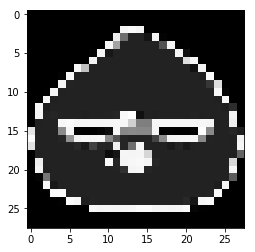

In [50]:
plt.imshow(a, cmap = 'Greys')

In [51]:
print(train_input.shape)
print(train_label.shape)

(76, 28, 28, 1)
(71, 3)


In [52]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'sigmoid'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
__________

In [54]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(x = train_input, y = train_label, batch_size = 5, epochs = 5)

ValueError: Input arrays should have the same number of samples as target arrays. Found 76 input samples and 71 target samples.